!module load py-efel

!module load py-bluepy

In [1]:
from bluepy.v2 import Simulation

import efel

from bluepy.v2 import Circuit
from bluepy.v2 import Cell
from bluepy.v2.enums import Synapse

ModuleNotFoundError: No module named 'bluepy'

In [2]:
from os import path

import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
import pickle


from json2html import *


In [3]:
#efel.getFeatureNames()

In [4]:
#features from Michiel

main_feat = ['AP_amplitude','AP_height','AP_duration_half_width','mean_frequency',
 'AHP_depth','AHP_time_from_peak','voltage_base',
 'time_to_first_spike','time_to_last_spike','ISI_CV','ISI_log_slope',
 'inv_first_ISI',
 'inv_second_ISI',
 'inv_third_ISI', 
 'inv_fourth_ISI',
 'inv_fifth_ISI',
 'inv_last_ISI'
]

### L5 mc2 MC and TPCA with metab

In [5]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig')

In [6]:
L5_mc2 = c.cells.get({'$target': 'mc2_Column', Cell.LAYER: 5})
print(L5_mc2['morph_class'].unique())
L5_mc2[L5_mc2['morph_class']=="INT"]['mtype'].unique()

[INT, PYR]
Categories (2, object): [INT, PYR]


[L5_CHC, L5_LBC, L5_SBC, L5_NBC, L5_BTC, L5_DBC, L5_NGC, L5_MC, L5_BP]
Categories (9, object): [L5_CHC, L5_LBC, L5_SBC, L5_NBC, ..., L5_DBC, L5_NGC, L5_MC, L5_BP]

In [7]:
L5_mc2.head()

x            y           z  \
127581  401.273275   777.242329  663.545787   
127587  479.062842  1203.219881  650.840833   
127597  575.633130   835.696354  623.590993   
127598  375.843247  1202.966925  624.225820   
127606  210.921265   704.423642  465.909465   

                                              orientation etype  layer  \
127581  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  dNAC      5   
127587  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cNAC      5   
127597  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cNAC      5   
127598  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  dNAC      5   
127606  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  dNAC      5   

                                                 me_combo morph_class  \
127581  dNAC_L23SBC_L5_CHC_5_rp110201_L5-1_idA_-_Scale...         INT   
127587  cNAC_L23NGC_L5_CHC_5_C091000D-I3_-_Scale_x1.00...         INT   
127597  cNAC_L23NGC_L5_CHC_5_C091000D-I3_-_Scale_x1.00...         INT   
127598  dNAC_L23SBC_L5_CHC_5_mtC070301B_idC_-_Scale_x1...         INT   
127606  dNAC_L23SBC_L5_CHC_5_mtC070301B_idC_-_Scale_x1...         INT   

                                               morphology   mtype region  \
127581     rp110201_L5-1_idA_-_Scale_x1.000_y1.050_z1.000  L5_CHC     L5   
127587  C091000D-I3_-_Scale_x1.000_y0.950_z1.000_-_Clo...  L5_CHC     L5   
127597  C091000D-I3_-_Scale_x1.000_y1.025_z1.000_-_Clo...  L5_CHC     L5   
127598  mtC070301B_idC_-_Scale_x1.000_y1.050_z1.000_-_...  L5_CHC     L5   
127606        mtC070301B_idC_-_Scale_x1.000_y1.025_z1.000  L5_CHC     L5   

       synapse_class  
127581           INH  
127587           INH  
127597           INH  
127598           INH  
127606           INH

In [8]:
L5mc2_TPC_A = L5_mc2[L5_mc2['mtype']=='L5_TPC:A'].index.tolist()
L5mc2_TPC_Astr = [str(i) for i in L5mc2_TPC_A]

L5mc2_MC = L5_mc2[L5_mc2['mtype']=='L5_MC'].index.tolist()
L5mc2_MCstr = [str(i) for i in L5mc2_MC]


In [9]:
len(L5mc2_TPC_A) + len(L5mc2_MC)

2132

In [10]:
len(L5mc2_MC)

110

In [10]:
# bbp to h5

# module load nix/viz/brion
# module load brion
# compartmentConverter <filename>.bbp <filename>.h5

In [11]:
#! less /gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_28july2020/BlueConfig

In [ ]:
# with met

sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/met/BlueConfig')
report = sim.report('soma', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_p150_17aug2020_L5mc2_MC_TPCA/out_vmv.txt')

report = sim.report('NaConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_p150_17aug2020_L5mc2_MC_TPCA/NaConcAllCmps.txt')


report = sim.report('ATPConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_p150_17aug2020_L5mc2_MC_TPCA/ATPConcAllCmps.txt')

report = sim.report('ADPConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_p150_17aug2020_L5mc2_MC_TPCA/ADPConcAllCmps.txt')


report = sim.report('KConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_p150_17aug2020_L5mc2_MC_TPCA/KConcAllCmps.txt')

report = sim.report('CaConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_p150_17aug2020_L5mc2_MC_TPCA/CaConcAllCmps.txt')


In [11]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_p150_17aug2020_L5mc2_MC_TPCA/out_vmv.txt')
nai = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_p150_17aug2020_L5mc2_MC_TPCA/NaConcAllCmps.txt')
atp = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_p150_17aug2020_L5mc2_MC_TPCA/ATPConcAllCmps.txt')
adp = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_p150_17aug2020_L5mc2_MC_TPCA/ADPConcAllCmps.txt')
ki = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_p150_17aug2020_L5mc2_MC_TPCA/KConcAllCmps.txt')
cai = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/met_p150_17aug2020_L5mc2_MC_TPCA/CaConcAllCmps.txt')


In [13]:
stim_start = 1
stim_end = 10000
trace = {'T': vmv['time'], 'V': vmv['162419'], 'stim_start': [stim_start], 'stim_end': [stim_end]}


feature_values = efel.getFeatureValues([trace], ['AP_amplitude', 'peak_time', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                                                 'AP_begin_voltage', 'mean_frequency'])[0]

feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}



from IPython.display import HTML

HTML(json2html.convert(json=feature_values))

In [15]:
feature_values.keys()

dict_keys(['AP_amplitude', 'peak_time', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 'AP_begin_voltage', 'mean_frequency'])

### L5 mc2 MC and TPCA without metab

#error after 8000 sec


sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/nomet/BlueConfig')
report = sim.report('soma', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/nomet_p150_17aug2020_L5mc2_MC_TPCA/out_vmv.txt')

report = sim.report('NaConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/nomet_p150_17aug2020_L5mc2_MC_TPCA/NaConcAllCmps.txt')


report = sim.report('ATPConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/nomet_p150_17aug2020_L5mc2_MC_TPCA/ATPConcAllCmps.txt')

report = sim.report('ADPConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/nomet_p150_17aug2020_L5mc2_MC_TPCA/ADPConcAllCmps.txt')


report = sim.report('KConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/nomet_p150_17aug2020_L5mc2_MC_TPCA/KConcAllCmps.txt')

report = sim.report('CaConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/nomet_p150_17aug2020_L5mc2_MC_TPCA/CaConcAllCmps.txt')


In [12]:
vmv2 = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/nomet/out_vmv.txt')
nai2 = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/nomet/NaConcAllCmps.txt')
atp2 = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/nomet/ATPConcAllCmps.txt')
adp2 = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/nomet/ADPConcAllCmps.txt')
ki2 = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/nomet/KConcAllCmps.txt')
cai2 = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/nomet/CaConcAllCmps.txt')


FileNotFoundError: [Errno 2] File b'/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/nomet/out_vmv.txt' does not exist: b'/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/nomet/out_vmv.txt'

In [16]:

trace2 = {'T': vmv2['time'], 'V': vmv2['162419'], 'stim_start': [stim_start], 'stim_end': [stim_end]}


feature_values2 = efel.getFeatureValues([trace2], ['AP_amplitude', 'peak_time', 'peak_voltage', 
                                                   'AP_begin_time', 'AP_begin_width', 
                                                 'AP_begin_voltage', 'mean_frequency'])[0]

feature_values2 = {feature_name: list(values) for feature_name, values in feature_values2.items()}



In [ ]:
feature_valuesDiff = {}

for k,v in feature_values.items():
    v2 = feature_values2.get(k, 0)
    dv = []
    
    for i,lv in enumerate(v):
        dv.append(np.median(lv) - np.median(v2[i]))
        
    feature_valuesDiff[k] = dv

In [ ]:
feature_valuesDiff['mean_frequency']

In [ ]:
#162419

labels, data = [*zip(*feature_valuesDiff.items())]  # 'transpose' items to parallel key, value lists

plt.boxplot(data,vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
plt.show()

In [ ]:
feature_valuesDiff.pop('AP_begin_time')
feature_valuesDiff.pop('peak_time')

In [ ]:
#162419

labels, data = [*zip(*feature_valuesDiff.items())]  # 'transpose' items to parallel key, value lists

plt.boxplot(data,vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
plt.show()

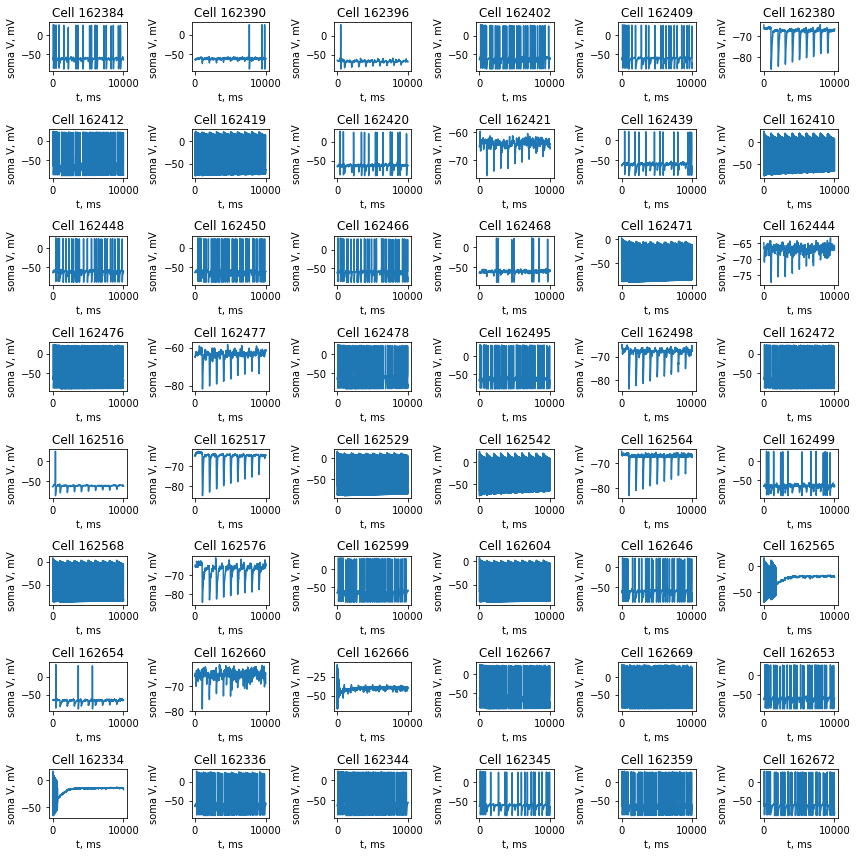

In [18]:
# with met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/met/plot_vmv_L5mc2_MC_withMet.png')


# no met 

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv2.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv2['time'],vmv2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

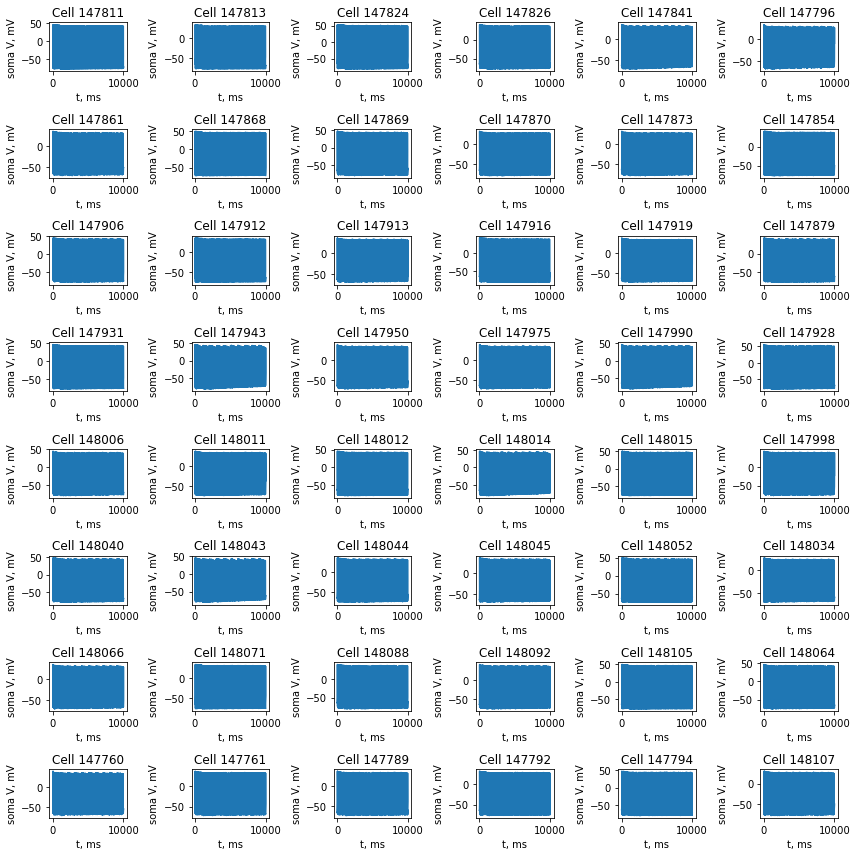

In [19]:
# with met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_vmv_L5mc2_TPCA_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_vmv_L5mc2_TPCA_withMet.png')


# no met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv2.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv2['time'],vmv2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

In [20]:
#with met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai['time'],nai[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_nai_L5mc2_MC_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_nai_L5mc2_MC_withMet.png')


# no met 

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai2.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai2['time'],nai2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()


In [22]:
#with met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai['time'],nai[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_nai_L5mc2_TPCA_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_nai_L5mc2_TPCA_withMet.png')


# no met

fig, axs = plt.subplots(8,6,figsize=(12,12))


for i,c in enumerate(nai2.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai2['time'],nai2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()



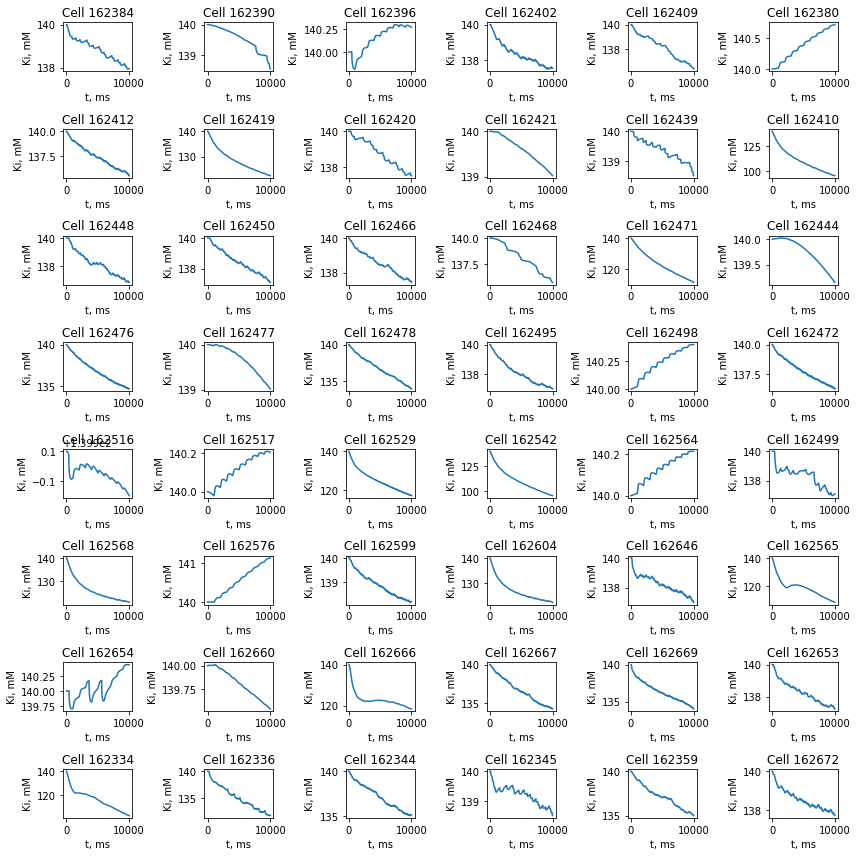

In [23]:
# with met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki['time'],ki[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_ki_L5mc2_MC_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_ki_L5mc2_MC_withMet.png')


# no met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki2.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki2['time'],ki2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()


# with met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki['time'],ki[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_ki_L5mc2_TPCA_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_ki_L5mc2_TPCA_withMet.png')


#no met

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki2.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki2['time'],ki2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_ki_L5mc2_TPCA_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_ki_L5mc2_TPCA_withMet.png')


In [24]:
#with  met 

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_MC_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_MC_withMet.png')


#no  met 

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp2.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp2['time'],atp2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_MC_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_MC_withMet.png')


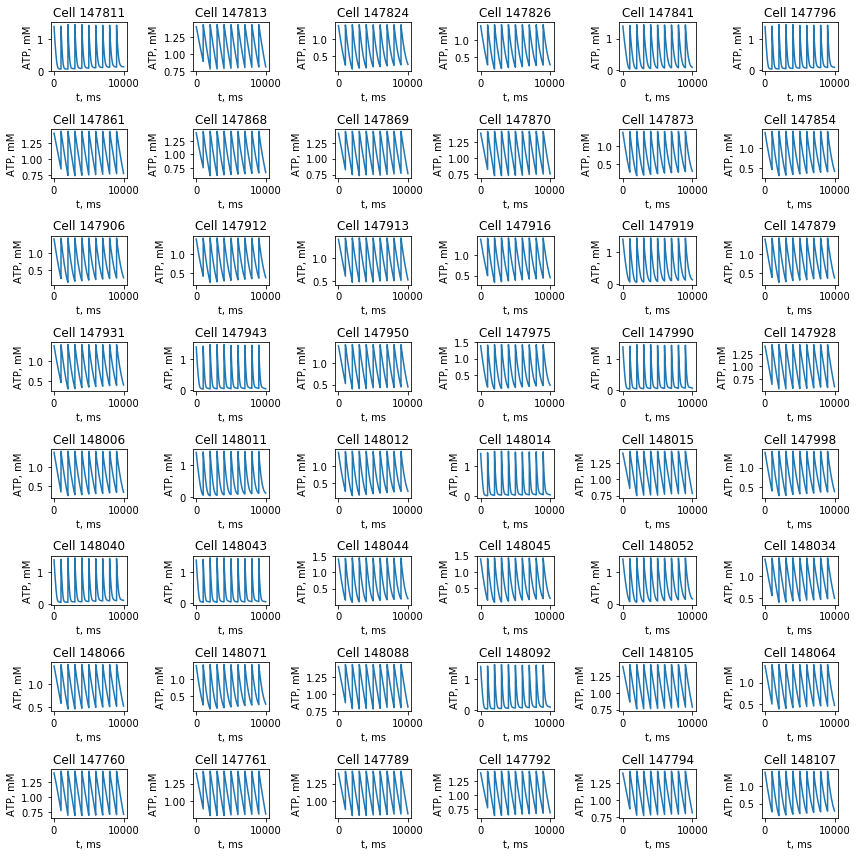

In [25]:
# with  met 

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_TPCA_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_TPCA_withMet.png')


# no  met 

fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp2.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp2['time'],atp2[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_TPCA_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_13july2020/plot_atp_L5mc2_TPCA_withMet.png')


### L5 mc2 MC and TPCA without metab

In [23]:
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/BlueConfig')
report = sim.report('soma')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/out_vmv.txt')

report = sim.report('NaConcAllCmps')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/NaConcAllCmps.txt')


report = sim.report('ATPConcAllCmps')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/ATPConcAllCmps.txt')


report = sim.report('KConcAllCmps')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/KConcAllCmps.txt')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
Ignoring unknown key: 'FlushBufferScalar'
Ignoring unknown key: 'FlushBufferScalar'
Ignoring unknown key: 'FlushBufferScalar'


In [24]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/out_vmv.txt')
nai = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/NaConcAllCmps.txt')
atp = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/ATPConcAllCmps.txt')
ki = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/KConcAllCmps.txt')


In [25]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_vmv_L5mc2_MC_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_vmv_L5mc2_MC_noMet.png')


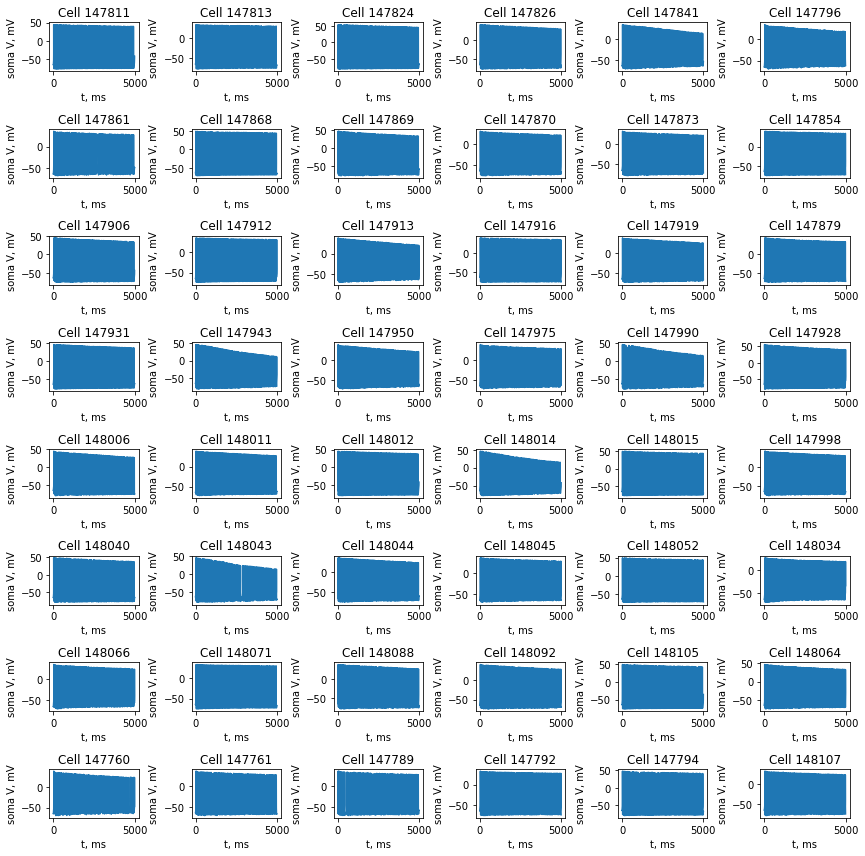

In [26]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_vmv_L5mc2_TPCA_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_vmv_L5mc2_TPCA_noMet.png')


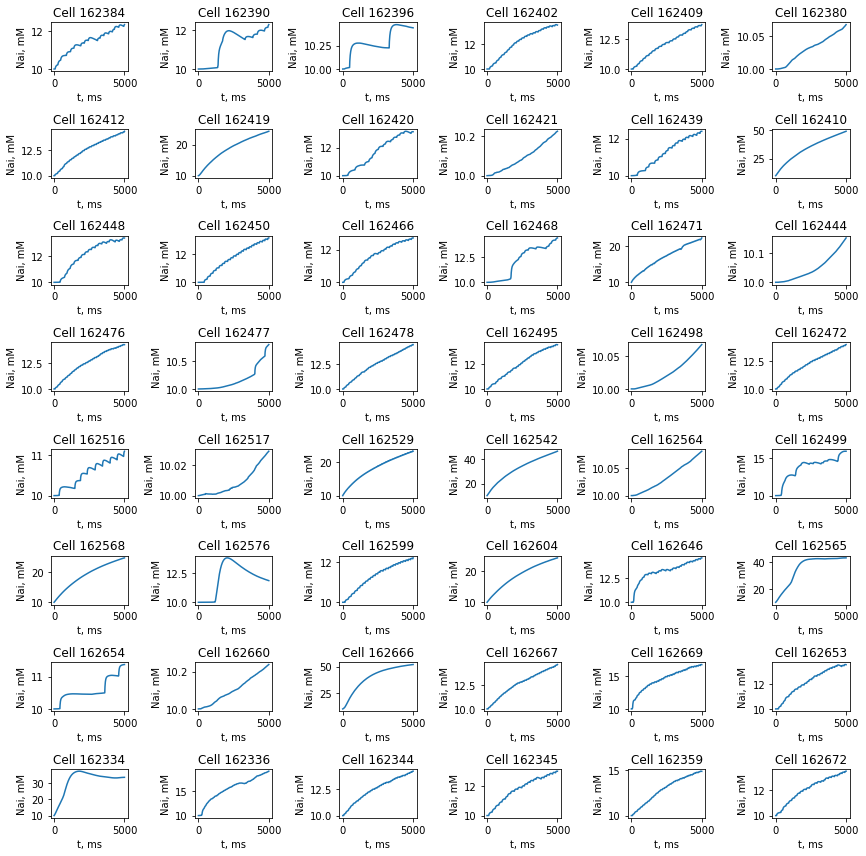

In [27]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai['time'],nai[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_nai_L5mc2_MC_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_nai_L5mc2_MC_noMet.png')


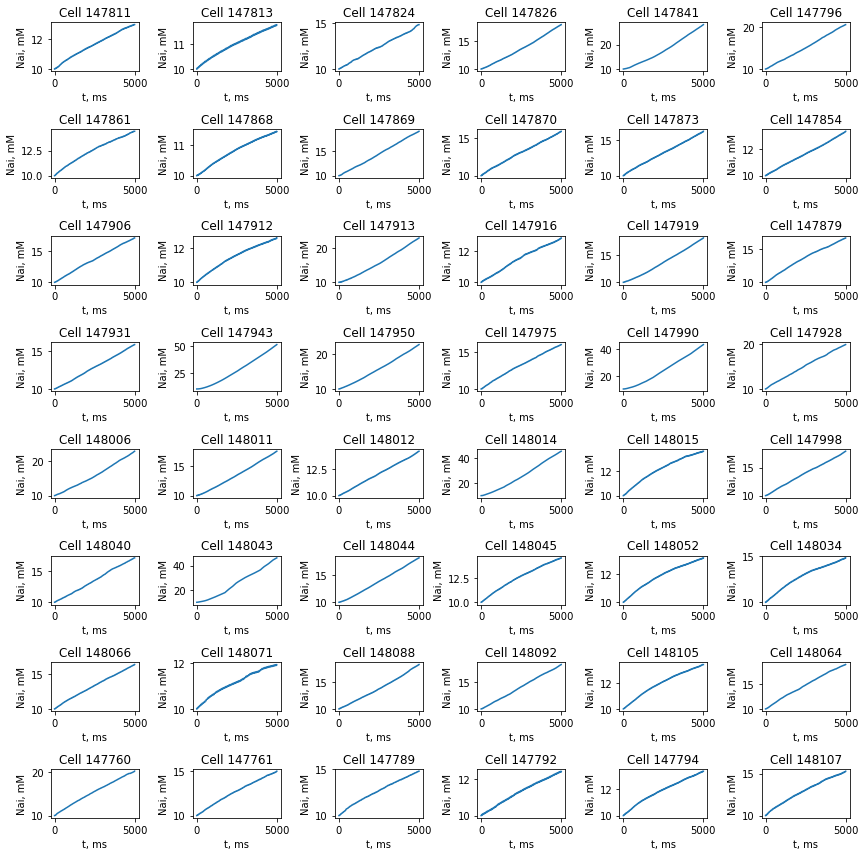

In [28]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai['time'],nai[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_nai_L5mc2_TPCA_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_nai_L5mc2_TPCA_noMet.png')


In [29]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki['time'],ki[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_ki_L5mc2_MC_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_ki_L5mc2_MC_noMet.png')


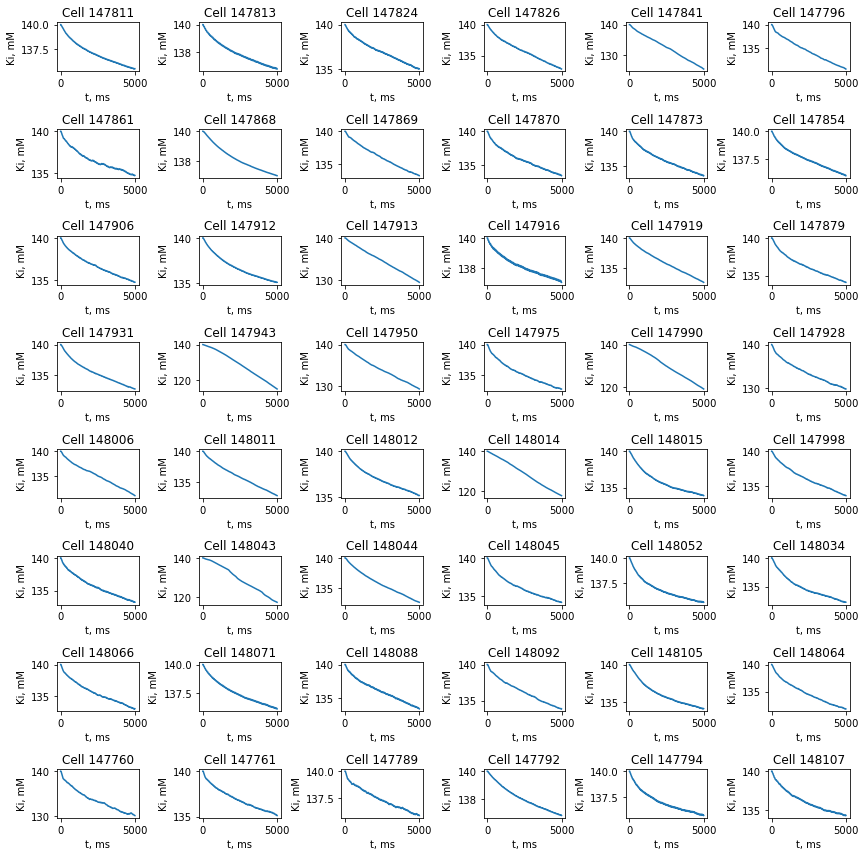

In [30]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki['time'],ki[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_ki_L5mc2_TPCA_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_ki_L5mc2_TPCA_noMet.png')


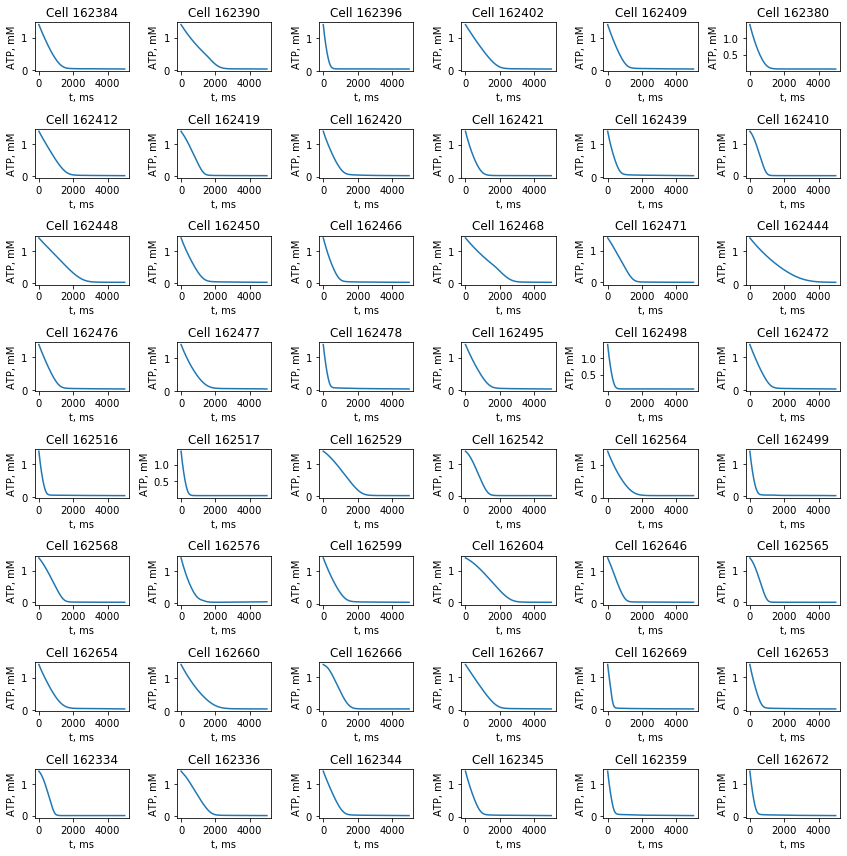

In [31]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_atp_L5mc2_MC_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_atp_L5mc2_MC_noMet.png')


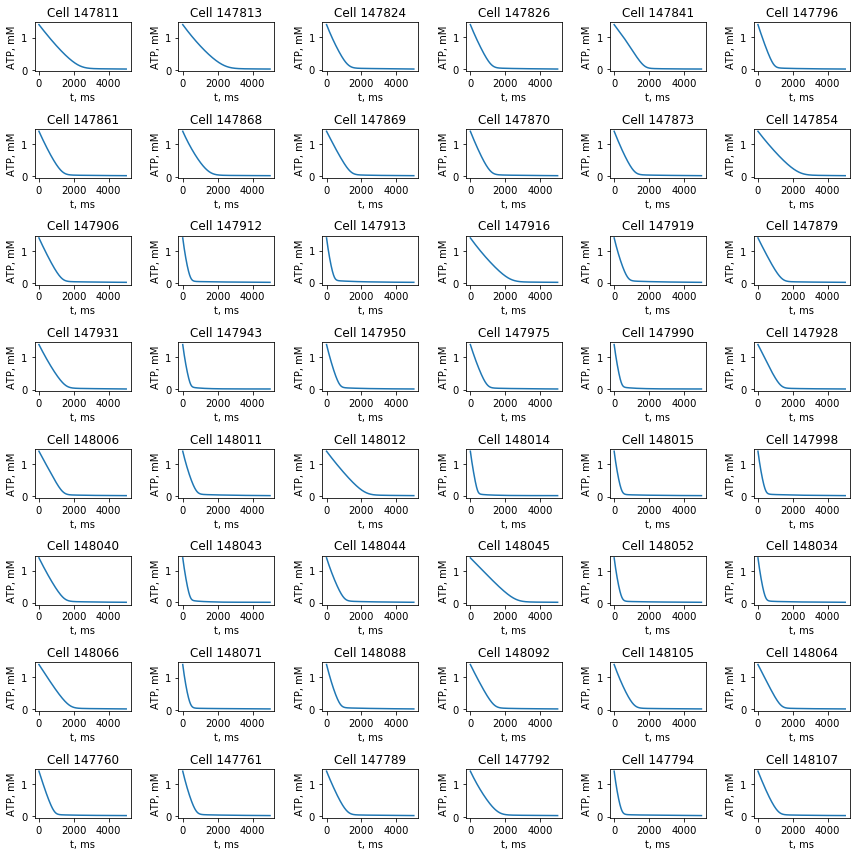

In [32]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_atp_L5mc2_TPCA_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_atp_L5mc2_TPCA_noMet.png')


In [26]:
outs_r_glut_withMet = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_glut_withMet_202008172030.tsv',header=None,sep='\t')

outs_r_gaba_withMet = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_gaba_withMet_202008172030.tsv',header=None,sep='\t')


#outs_r_glut_noMet = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_glut_noMet_202006250821.tsv',header=None,sep='\t')

#outs_r_gaba_noMet = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_gaba_noMet_202006250821.tsv',header=None,sep='\t')




In [28]:
outs_r_glut_withMet['time, ms'] = 1000*(outs_r_glut_withMet[0]+1)
outs_r_gaba_withMet['time, ms'] = 1000*(outs_r_gaba_withMet[0]+1)

#outs_r_glut_noMet['time, ms'] = 1000*(outs_r_glut_noMet[0]+1)
#outs_r_gaba_noMet['time, ms'] = 1000*(outs_r_gaba_noMet[0]+1)

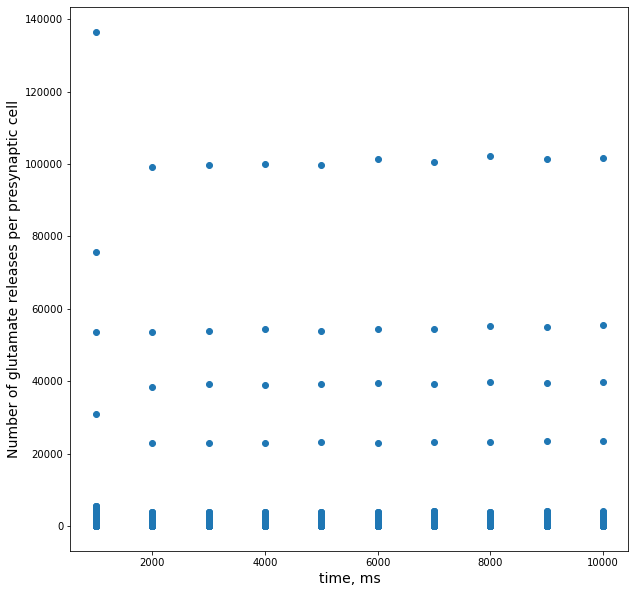

In [29]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_glut_withMet['time, ms'],outs_r_glut_withMet[2],'o')

plt.xlabel('time, ms', fontsize=14)
plt.ylabel('Number of glutamate releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_glutamatereleases_24june2020.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_glutamatereleases_24june2020.png')


fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_glut_noMet['time, ms'],outs_r_glut_noMet[2],'o')

plt.xlabel('time, ms', fontsize=14)
plt.ylabel('Number of glutamate releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_glutamatereleases_24june2020.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_glutamatereleases_24june2020.png')


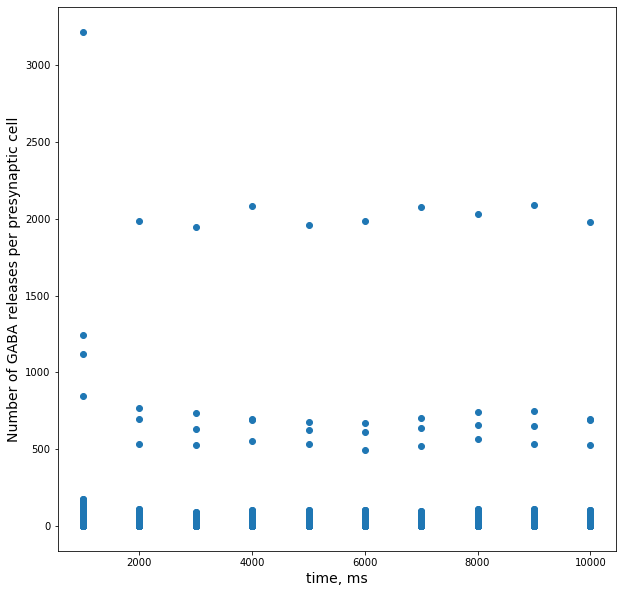

In [31]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_gaba_withMet['time, ms'],outs_r_gaba_withMet[2],'o')

plt.xlabel('time, ms', fontsize=14)
plt.ylabel('Number of GABA releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_gabareleases_24june2020.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_gabareleases_24june2020.png')


fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_gaba_noMet['time, ms'],outs_r_gaba_noMet[2],'o')

plt.xlabel('time, ms', fontsize=14)
plt.ylabel('Number of GABA releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_gabareleases_24june2020.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_gabareleases_24june2020.png')


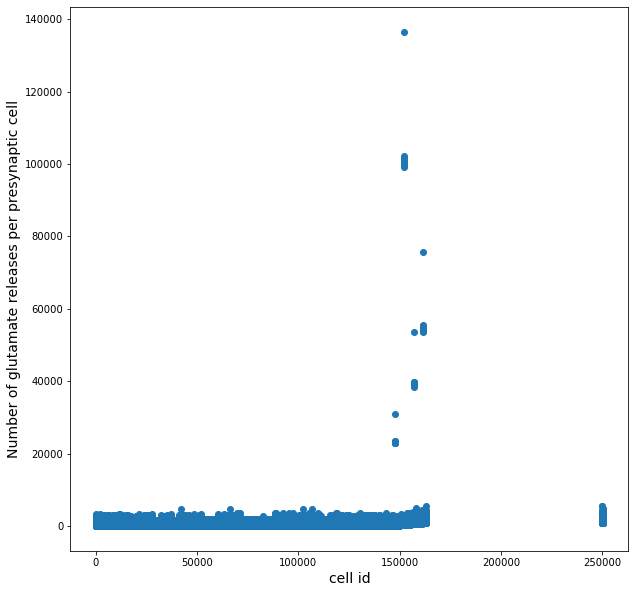

In [32]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_glut_withMet[1],outs_r_glut_withMet[2],'o')

plt.xlabel('cell id', fontsize=14)
plt.ylabel('Number of glutamate releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.png')


fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_glut_noMet[1],outs_r_glut_noMet[2],'o')

plt.xlabel('cell id', fontsize=14)
plt.ylabel('Number of glutamate releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.png')


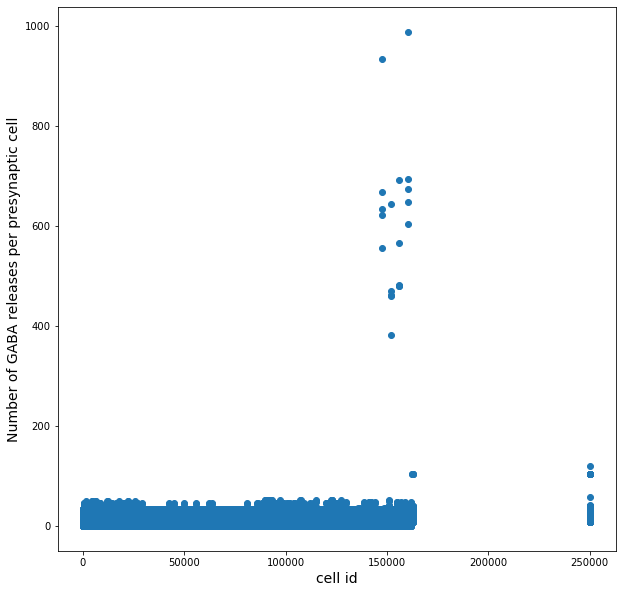

In [39]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_gaba_withMet[1],outs_r_gaba_withMet[2],'o')

plt.xlabel('cell id', fontsize=14)
plt.ylabel('Number of GABA releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.png')


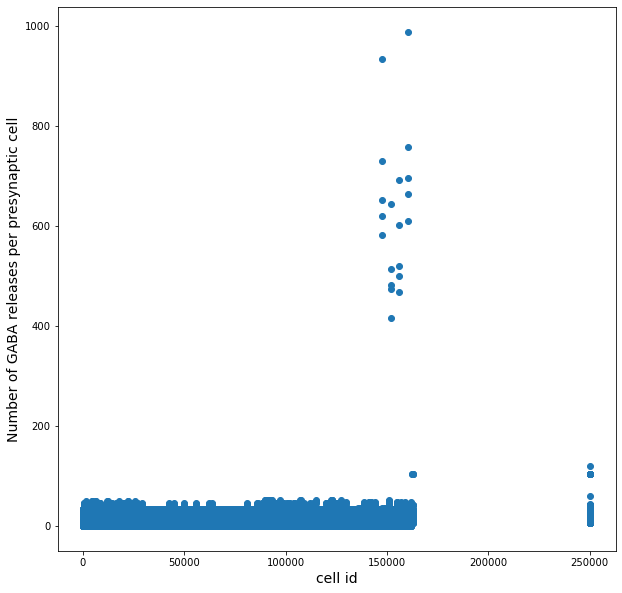

In [40]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_gaba_noMet[1],outs_r_gaba_noMet[2],'o')

plt.xlabel('cell id', fontsize=14)
plt.ylabel('Number of GABA releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.png')


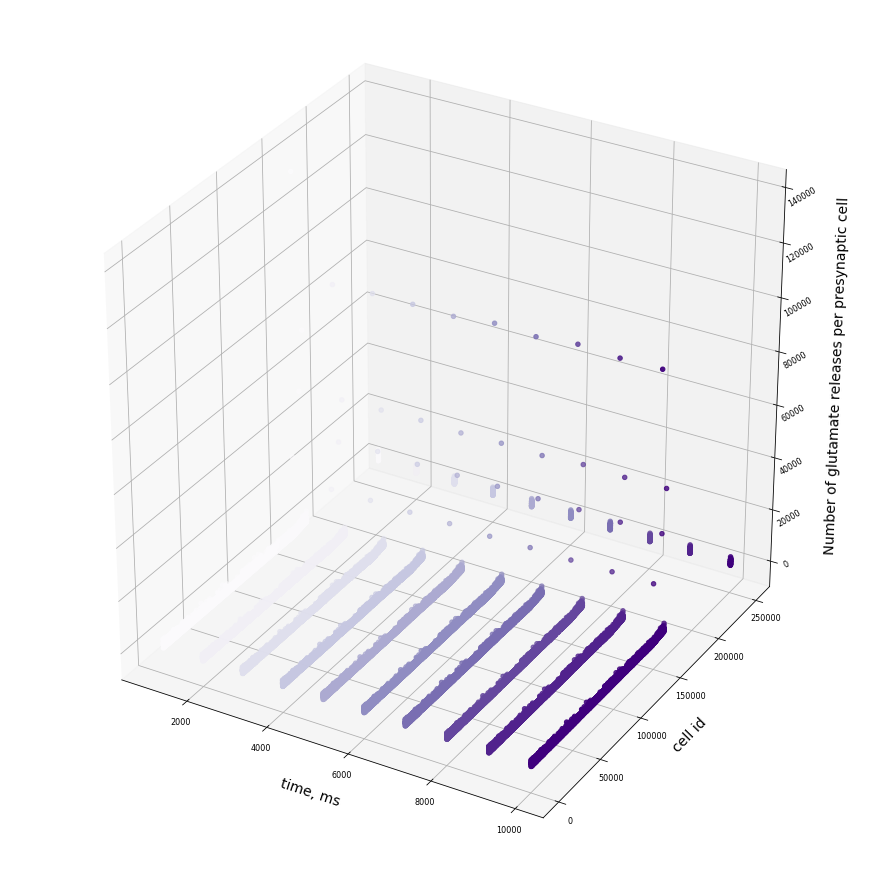

In [33]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

xs = outs_r_glut_withMet['time, ms']
ys = outs_r_glut_withMet[1]
zs = outs_r_glut_withMet[2]

ax.scatter(xs, ys, zs, marker='o',c=xs, cmap=plt.cm.Purples)


ax.set_xlabel('time, ms',labelpad=10,fontsize=14)
ax.set_ylabel('cell id',labelpad=10,fontsize=14)
ax.set_zlabel('Number of glutamate releases per presynaptic cell',labelpad=21,fontsize=14)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="z", labelsize=8, labelrotation=30)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.png')


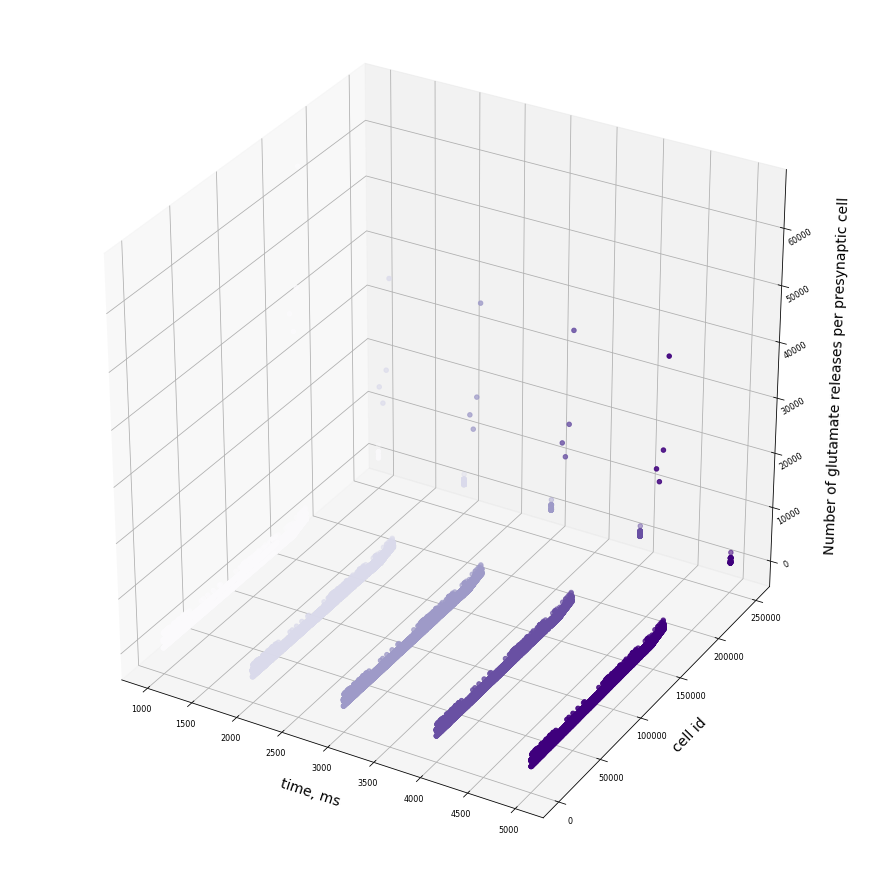

In [42]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

xs = outs_r_glut_noMet['time, ms']
ys = outs_r_glut_noMet[1]
zs = outs_r_glut_noMet[2]

ax.scatter(xs, ys, zs, marker='o',c=xs, cmap=plt.cm.Purples)


ax.set_xlabel('time, ms',labelpad=10,fontsize=14)
ax.set_ylabel('cell id',labelpad=10,fontsize=14)
ax.set_zlabel('Number of glutamate releases per presynaptic cell',labelpad=21,fontsize=14)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="z", labelsize=8, labelrotation=30)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.png')


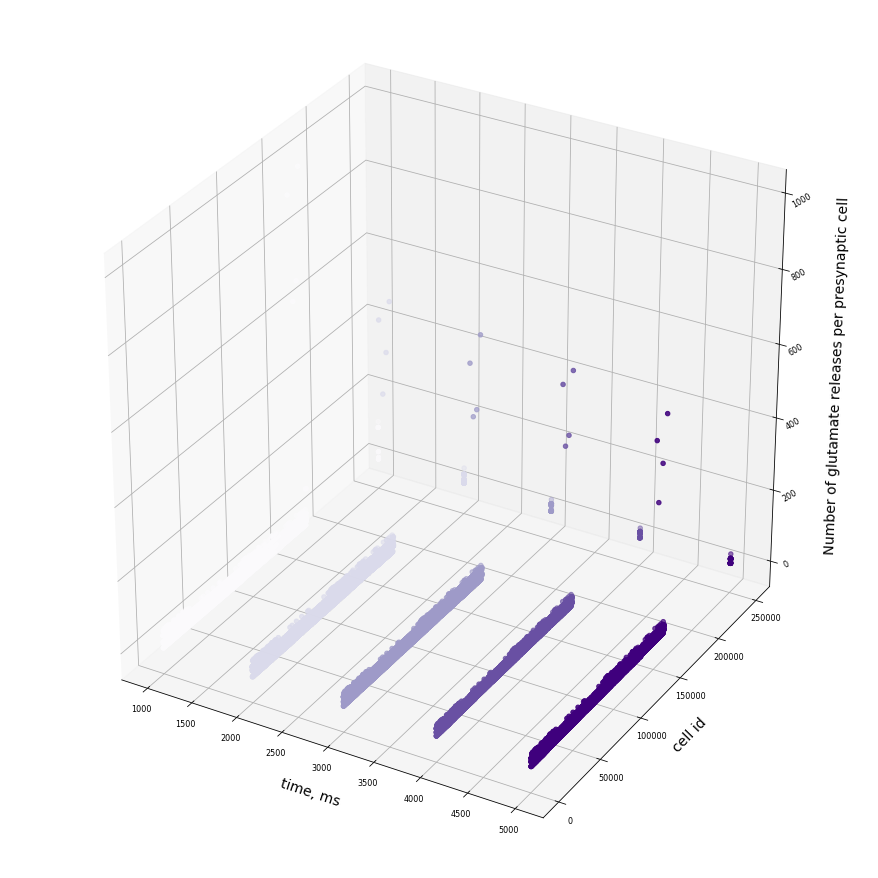

In [43]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

xs = outs_r_gaba_withMet['time, ms']
ys = outs_r_gaba_withMet[1]
zs = outs_r_gaba_withMet[2]

ax.scatter(xs, ys, zs, marker='o',c=xs, cmap=plt.cm.Purples)


ax.set_xlabel('time, ms',labelpad=10,fontsize=14)
ax.set_ylabel('cell id',labelpad=10,fontsize=14)
ax.set_zlabel('Number of glutamate releases per presynaptic cell',labelpad=21,fontsize=14)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="z", labelsize=8, labelrotation=30)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.png')


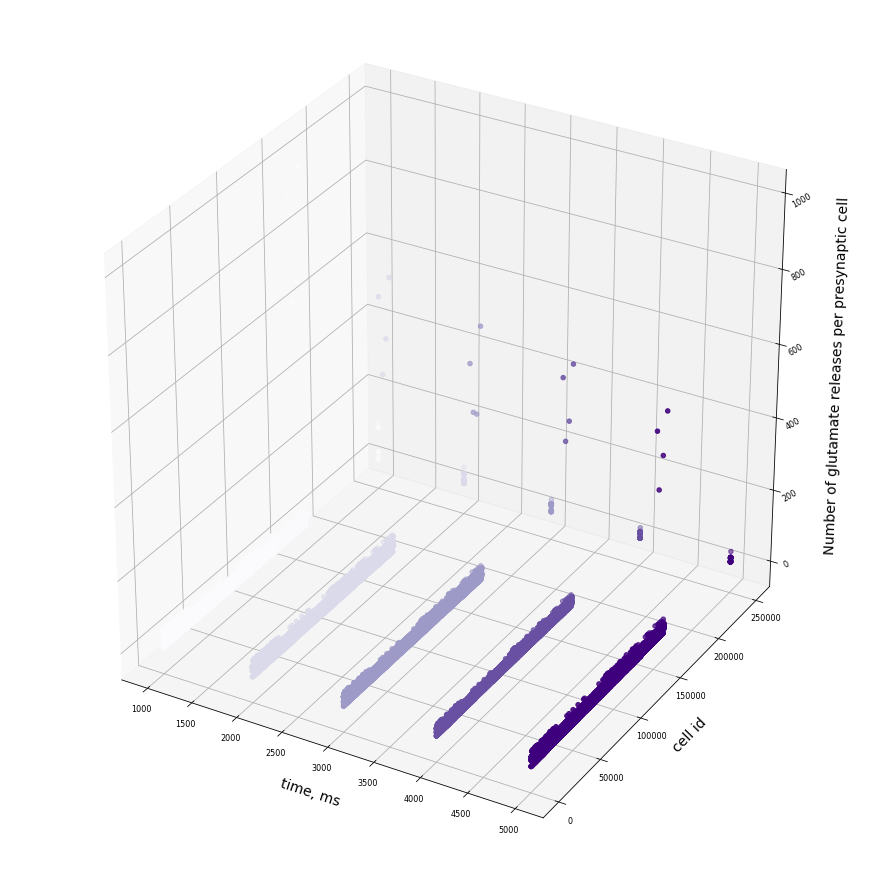

In [44]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

xs = outs_r_gaba_noMet['time, ms']
ys = outs_r_gaba_noMet[1]
zs = outs_r_gaba_noMet[2]

ax.scatter(xs, ys, zs, marker='o',c=xs, cmap=plt.cm.Purples)


ax.set_xlabel('time, ms',labelpad=10,fontsize=14)
ax.set_ylabel('cell id',labelpad=10,fontsize=14)
ax.set_zlabel('Number of glutamate releases per presynaptic cell',labelpad=21,fontsize=14)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="z", labelsize=8, labelrotation=30)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.png')


In [ ]:
#old

### L1

In [5]:
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/test_cells_mc2_L1/BlueConfig')
report = sim.report('soma')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_L1_02june2020/out_vmv.txt')

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


In [8]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_L1_02june2020/out_vmv.txt')
vmv.head()

time          2         3          6         11         21         31  \
0   0.0 -65.000000 -65.00000 -65.000000 -65.000000 -65.000000 -65.000000   
1   0.1 -65.157120 -65.18924 -65.083435 -65.206215 -65.168420 -65.136215   
2   0.2 -65.204994 -65.24127 -65.116710 -65.280396 -65.213370 -65.160164   
3   0.3 -65.204090 -65.23641 -65.128260 -65.295620 -65.220665 -65.129490   
4   0.4 -65.166360 -65.19135 -65.122444 -65.263060 -65.203190 -65.056520   

          39        48         49  ...      28366      28371      28376  \
0 -65.000000 -65.00000 -65.000000  ... -65.000000 -65.000000 -65.000000   
1 -65.125670 -65.15842 -65.137930  ... -65.081460 -65.117516 -65.101364   
2 -65.164200 -65.19833 -65.161380  ... -65.107445 -65.167100 -65.127350   
3 -65.165855 -65.19505 -65.129020  ... -65.101340 -65.192620 -65.112490   
4 -65.142944 -65.16003 -65.053314  ... -65.066130 -65.200790 -65.063080   

       28379     28383      28384      28386     28407     28412      28421  
0 -65.000000 -65.00000 -65.000000 -65.000000 -65.00000 -65.00000 -65.000000  
1 -65.110535 -65.23725 -65.292534 -65.225330 -65.19260 -65.10667 -65.204330  
2 -65.138260 -65.32961 -65.420715 -65.321556 -65.29357 -65.14976 -65.305504  
3 -65.128100 -65.36445 -65.464920 -65.373190 -65.35757 -65.16294 -65.359120  
4 -65.086655 -65.35344 -65.445800 -65.392530 -65.39393 -65.15433 -65.375626  

[5 rows x 215 columns]

In [13]:
len(vmv.columns)

215

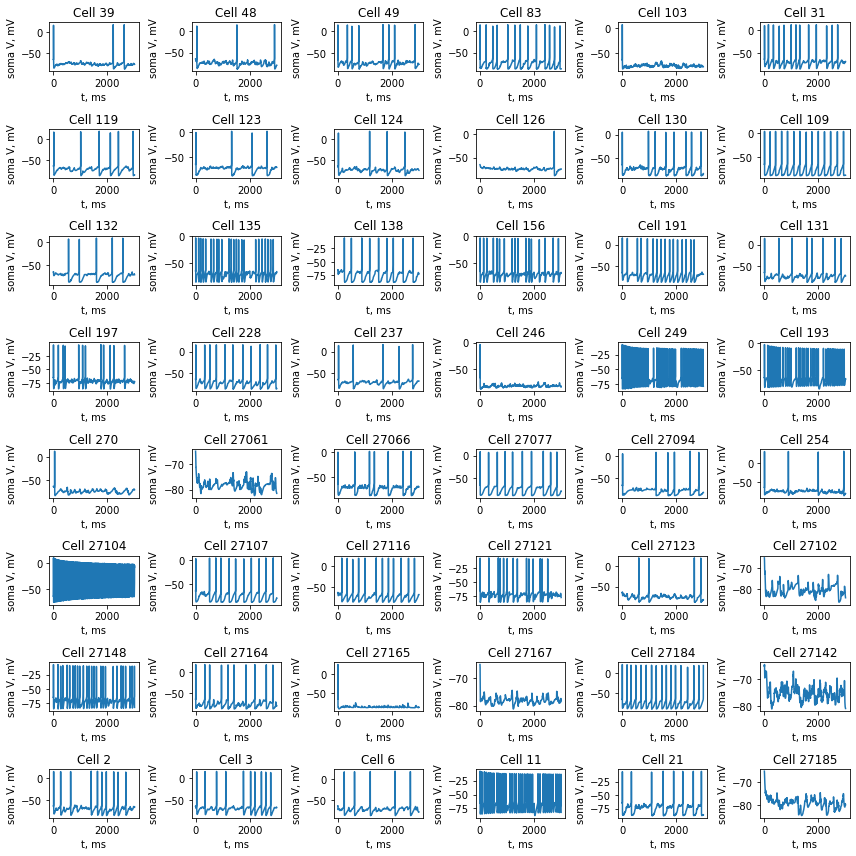

In [18]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.columns[0:49]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/test_cells_mc2_L1/plot_vmv_L1.pdf')


### mc2 nometab

In [5]:
#sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/calcium/BlueConfig')

report = sim.report('soma')
data = report.get()

#data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_nometab_14june2020/out_vmv.txt')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


In [6]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_nometab_14june2020/out_vmv.txt')
vmv.head()


time          2         3          6         11         21         31  \
0   0.0 -65.000000 -65.00000 -65.000000 -65.000000 -65.000000 -65.000000   
1   0.1 -65.157120 -65.18924 -65.083435 -65.206215 -65.168420 -65.136215   
2   0.2 -65.204994 -65.24127 -65.116710 -65.280396 -65.213370 -65.160164   
3   0.3 -65.204090 -65.23641 -65.128260 -65.295620 -65.220665 -65.129490   
4   0.4 -65.166360 -65.19135 -65.122444 -65.263060 -65.203190 -65.056520   

          39        48         49  ...     163211    163221     163231  \
0 -65.000000 -65.00000 -65.000000  ... -65.000000 -65.00000 -65.000000   
1 -65.125670 -65.15842 -65.137930  ... -65.207016 -65.44655 -65.392580   
2 -65.164200 -65.19833 -65.161380  ... -65.272770 -65.32105 -65.523990   
3 -65.165855 -65.19505 -65.129020  ... -65.283160 -64.92055 -65.554726   
4 -65.142944 -65.16003 -65.053314  ... -65.257920 -64.32400 -65.522220   

     163241     163250    163254    163255     163257    163260     163263  
0 -65.00000 -65.000000 -65.00000 -65.00000 -65.000000 -65.00000 -65.000000  
1 -65.30580 -65.217430 -65.39965 -65.13826 -65.172615 -65.11491 -65.128235  
2 -65.44089 -65.286970 -65.53355 -65.09049 -65.250880 -65.15506 -65.180725  
3 -65.49640 -65.297775 -65.56550 -64.95186 -65.281610 -65.15517 -65.194490  
4 -65.49726 -65.270966 -65.53265 -64.74878 -65.278600 -65.12590 -65.180530  

[5 rows x 22919 columns]

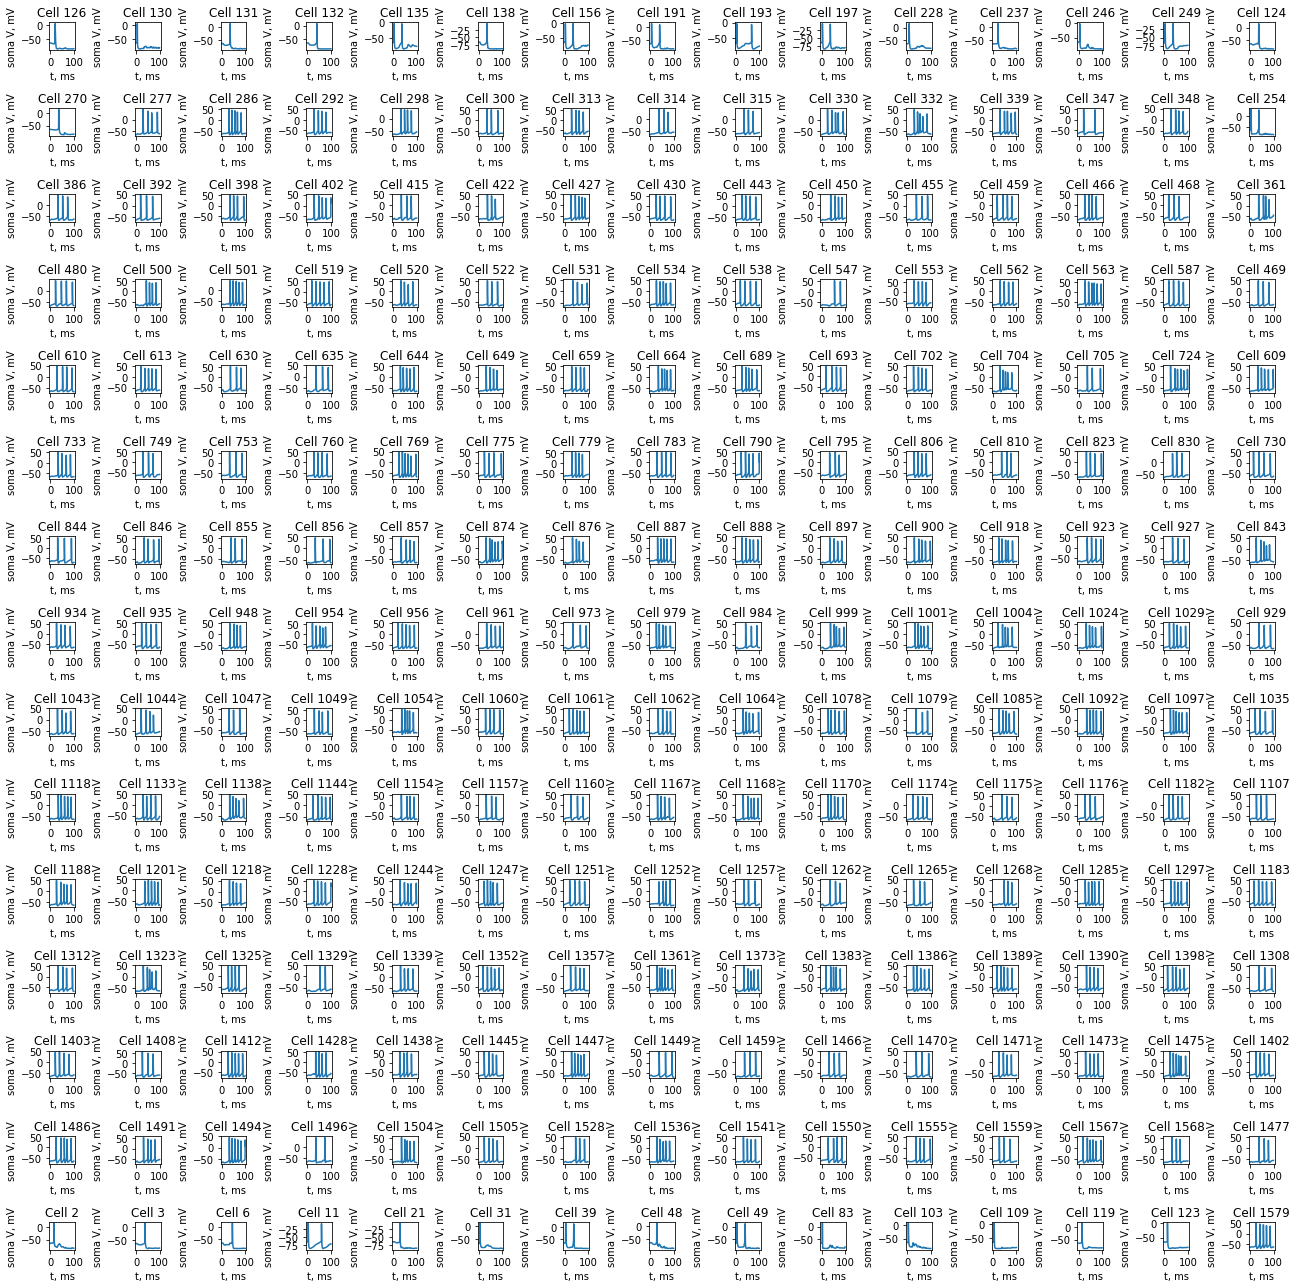

In [15]:
fig, axs = plt.subplots(15,15,figsize=(18,18))

for i,c in enumerate(vmv.columns[0:226]):
    if i == 0:
        continue
    x = i % 15 -1
    y = i // 15 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/calcium/plot_vmv_mc2_nometab_64.pdf')

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/calcium/plot_vmv_mc2_nometab_100.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/calcium/plot_vmv_mc2_nometab_225.pdf')


### met mc2 5kms

In [10]:
!squeue -u shichkov

JOBID     USER     ACCOUNT           NAME       PARTITION ST     REASON     START_TIME       END_TIME      TIME_LEFT NODES               NODELIST(REASON)
858094    shichkov proj34              sh            prod  R       None       06:58:54       18:58:54        4:53:34     2                     r1i7n[1,8]
858082    shichkov proj34              sh            prod  R       None       06:33:17       18:33:17        4:27:57    12                    r1i4n[0-11]
858388    shichkov proj34              sh            prod  R       None       13:34:26       17:34:26        3:29:06    12 r1i5n[3-4,28],r1i6n[6-8,25-27],r1i7n21,r2i1n[24-25]


In [11]:
!ls /gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/ca_met

BlueConfig				 nrn_jl_syn_met_16june_atprate_v2.py
julia_code_atpmod_CaGly.jl		 nrn_jl_syn_met_16june.py
julia_code_atpmod.jl			 pydamus_2020-06-16_12h41.log
julia_code.jl				 pydamus_2020-06-16_12h53.log
ngv-stderr858308.log			 pydamus_2020-06-16_13h11.log
nrn_jl_syn_12june_nometab_calcium_cp.py  pydamus_2020-06-16_13h53.log
nrn_jl_syn_12june_nometab_calcium.py	 run_syn_newenv_2.sh
nrn_jl_syn_14june_atpmod.py		 run_syn_newenv_3.sh
nrn_jl_syn_9june_atpmod.py		 slurm-858308.out
nrn_jl_syn_9june_v1.py			 user.target


In [13]:
!mkdir /gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020

In [14]:
#modif now, use BlueConfig_bkp
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/ca_met/BlueConfig')

report = sim.report('soma')
data = report.get()

data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/out_vmv.txt')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


In [15]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/out_vmv.txt')
vmv.head()


time          2
0   0.0 -65.000000
1   0.1 -65.157120
2   0.2 -65.204994
3   0.3 -65.204090
4   0.4 -65.166360

In [18]:
vmv.columns

Index(['time', '2'], dtype='object')

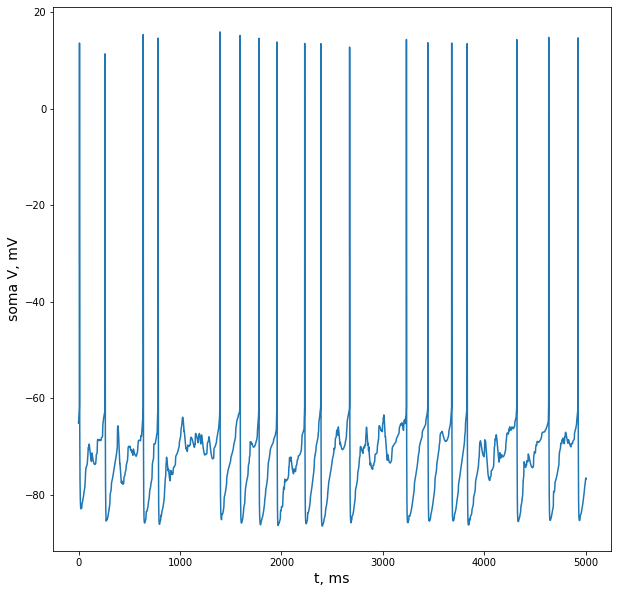

In [24]:
fig = plt.figure(figsize=(10,10))

plt.plot(vmv['time'],vmv['2'])
plt.xlabel('t, ms',fontsize=14)
plt.ylabel('soma V, mV',fontsize=14)

#plt.savefig('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/plot_vmv_mc2_metab_a2.pdf')


In [25]:
#modif now, use BlueConfig_bkp
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/ca_met/BlueConfig')

report = sim.report('soma')
data = report.get()

data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/out_vmv_pyr.txt')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


In [26]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/out_vmv_pyr.txt')
vmv.head()


time     127631
0   0.0 -65.000000
1   0.1 -65.083855
2   0.2 -65.061226
3   0.3 -64.974650
4   0.4 -64.837000

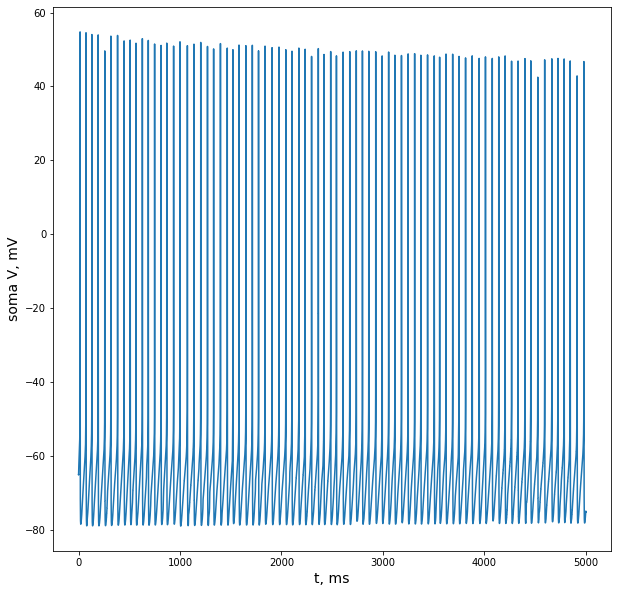

In [29]:
fig = plt.figure(figsize=(10,10))

plt.plot(vmv['time'],vmv['127631'])
plt.xlabel('t, ms',fontsize=14)
plt.ylabel('soma V, mV',fontsize=14)

#plt.savefig('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/plot_vmv_mc2_metab_a127631.pdf')
